In [202]:
import warnings
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Data/titanic_cleaned.csv')
df.head(3)

,pclass,survived,sibsp,parch,fare,MissingBodyIndicator,age_imputed,age_missing_flag,sex_male,embarked_Q,embarked_S,age_chunks_ord_enc
0,1,1,0,0,211.3375,1,29.0000,0.0,0,0,1,1
1,1,1,1,2,151.5500,1,0.9167,0.0,1,0,1,0
2,1,0,1,2,151.5500,1,2.0000,0.0,0,0,1,0


In [3]:
target = ['survived']
x, y = df.drop(columns=target), df[target]

In [4]:
tr_x, ts_x, tr_y, ts_y = train_test_split(x,y,test_size=.3, random_state=9)
tr_x.shape, ts_x.shape, tr_y.shape, ts_y.shape

((914, 11), (392, 11), (914, 1), (392, 1))

In [18]:
def evaluate_log_reg(x,y, random_seed):
    tr_x, ts_x, tr_y, ts_y = train_test_split(x,y,test_size=.3, random_state=random_seed)
    
    log_reg = LogisticRegression()
    log_reg.fit(tr_x, tr_y)
    
    y_pred = log_reg.predict(ts_x)
    
    accuracy = accuracy_score(ts_y, y_pred)
    precision = precision_score(ts_y, y_pred)
    recall = recall_score(ts_y, y_pred)
    f1_sc = f1_score(ts_y, y_pred)
    
    print(f'Accuracy : {accuracy:.02f}, Precision : {precision:.02f}, Recall : {recall:.02f}, F1-score : {f1_sc:.02f}')
    sns.heatmap(confusion_matrix(ts_y, y_pred), annot=True, fmt = '.3g')

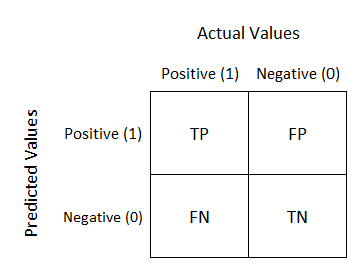

Accuracy : 0.79, Precision : 0.74, Recall : 0.66, F1-score : 0.70


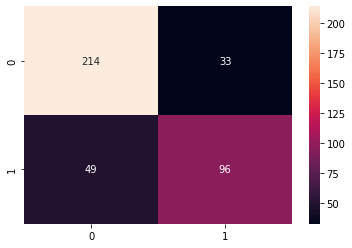

In [19]:
evaluate_log_reg(x,y,9)

Accuracy : 0.81, Precision : 0.79, Recall : 0.65, F1-score : 0.71


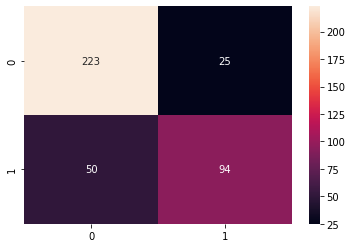

In [20]:
evaluate_log_reg(x,y,19)

Accuracy : 0.75, Precision : 0.65, Recall : 0.66, F1-score : 0.66


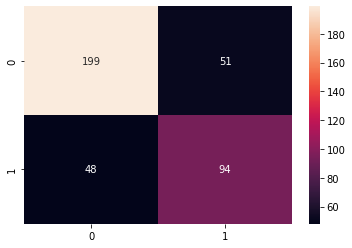

In [21]:
evaluate_log_reg(x,y,91)

# Cross-Validation

In [43]:
from sklearn.model_selection import cross_validate

In [44]:
log_reg = LogisticRegression()

In [69]:
cv = cross_validate(estimator=log_reg, X=x, y=y, scoring = ['accuracy'], cv = 5, n_jobs=-1, return_estimator=True, return_train_score=True)

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge

In [70]:
cv

{'fit_time': array([0.02073503, 0.00968409, 0.01859879, 0.01688123, 0.00962496]),
 'score_time': array([0.00178504, 0.00068283, 0.00195003, 0.00166512, 0.00073814]),
 'estimator': [LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression()],
 'test_accuracy': array([0.60687023, 0.85823755, 0.81992337, 0.7394636 , 0.66283525]),
 'train_accuracy': array([0.81704981, 0.78277512, 0.79904306, 0.82870813, 0.83349282])}

In [60]:
best_model = cv.get('estimator')[2]
best_model

LogisticRegression()

In [ ]:
LogisticRegression()

# Hyper Parameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [86]:
# Defining the parameters grid for the model that we want to tune
parameters_grid = {'penalty' : ['l1', 'l2', 'elasticnet', None],
                   'fit_intercept' : [True, False],
                   'intercept_scaling' : [1,1.1,1.2,1.3],
                   'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                   'max_iter' : [100,200,300,400,500],
                   'warm_start' : [True, False]}

# Generating the base estimator
base_estimator = LogisticRegression()

# Creating the search/tuner object
grid_search = GridSearchCV(estimator = base_estimator, 
                           param_grid = parameters_grid, 
                           scoring = 'accuracy', 
                           cv = 5, 
                           return_train_score = True)

In [87]:
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'intercept_scaling': [1, 1.1, 1.2, 1.3],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'warm_start': [True, False]},
             return_train_score=True, scoring='accuracy')

In [88]:
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'intercept_scaling': [1, 1.1, 1.2, 1.3],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'warm_start': [True, False]},
             return_train_score=True, scoring='accuracy')

In [93]:
grid_search.best_score_

0.7458687958819572

In [94]:
grid_search.best_params_

{'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear',
 'warm_start': True}

In [96]:
best_model = grid_search.best_estimator_

In [100]:
res = grid_search.cv_results_
res.get('mean_fit_time').shape

(1920,)

In [104]:
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'intercept_scaling': [1, 1.1, 1.2, 1.3],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'warm_start': [True, False]},
             return_train_score=True, scoring='accuracy')

In [142]:
x = x.drop(columns = ['embarked_Q','embarked_S'])

tr_x, ts_x, tr_y, ts_y = train_test_split(x,y,test_size=.3, random_state=19, stratify=y)

parameters_grid = {'penalty' : ['l1', 'l2'],
                   'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                   'max_iter' : [100,200,300,400,500],
                   'warm_start' : [True, False]}

grid_search_2 = GridSearchCV(estimator = base_estimator, 
                             param_grid = parameters_grid, 
                             scoring = 'recall', 
                             cv = 3,
                             return_train_score = True)

grid_search_2.fit(tr_x, tr_y)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'warm_start': [True, False]},
             return_train_score=True, scoring='recall')

In [143]:
grid_search_2.score(ts_x, ts_y)

0.6442953020134228

In [118]:
grid_search_2.score(ts_x, ts_y)

0.6388888888888888

In [138]:
y_pred = grid_search_2.predict(ts_x)

<AxesSubplot: >

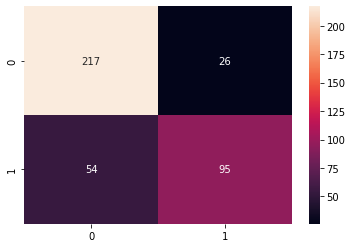

In [139]:
sns.heatmap(confusion_matrix(ts_y, y_pred), annot=True, fmt = '.3g')

In [140]:
accuracy_score(ts_y, y_pred)

0.7959183673469388

In [144]:
accuracy_score(ts_y, grid_search_2.predict(ts_x))

0.7882653061224489

In [146]:
f1_score(ts_y, grid_search_2.predict(ts_x))

0.6981818181818181

<AxesSubplot: >

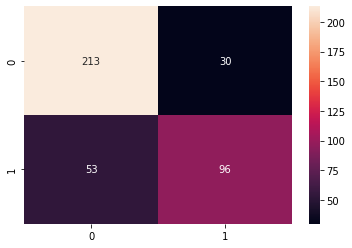

In [147]:
sns.heatmap(confusion_matrix(ts_y, grid_search_2.predict(ts_x)), annot=True, fmt = '.3g')

# Balance the data

In [150]:
import imblearn

In [153]:
100*(df.survived.value_counts()/df.shape[0])

0    61.8683
1    38.1317
Name: survived, dtype: float64

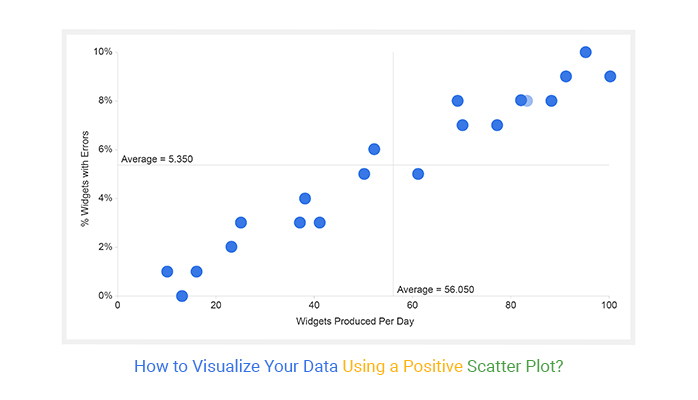

In [154]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [155]:
target = ['survived']
x, y = df.drop(columns = target), df[target]

In [156]:
x.shape, y.shape

((1306, 11), (1306, 1))

In [164]:
# Instantiating the smote oversampler
smote = SMOTE()
x_resampled_smote, y_resampled_smote = smote.fit_resample(x, y)

In [168]:
# Instantiating the adasyn oversampler
adasyn = ADASYN()
x_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(x, y)

In [169]:
x_resampled_adasyn.shape, y_resampled_adasyn.shape

((1642, 11), (1642, 1))

In [165]:
x_resampled_smote.shape, y_resampled_smote.shape

((1616, 11), (1616, 1))

In [159]:
y.value_counts()

survived
0           808
1           498
dtype: int64

In [166]:
y_resampled_smote.value_counts()

survived
0           808
1           808
dtype: int64

In [170]:
y_resampled_adasyn.value_counts()

survived
1           834
0           808
dtype: int64

### Testing the resampled data

In [161]:
def evaluate_log_reg(x,y, random_seed):
    tr_x, ts_x, tr_y, ts_y = train_test_split(x,y,test_size=.3, random_state=random_seed)
    
    log_reg = LogisticRegression()
    log_reg.fit(tr_x, tr_y)
    
    y_pred = log_reg.predict(ts_x)
    
    accuracy = accuracy_score(ts_y, y_pred)
    precision = precision_score(ts_y, y_pred)
    recall = recall_score(ts_y, y_pred)
    f1_sc = f1_score(ts_y, y_pred)
    
    print(f'Accuracy : {accuracy:.02f}, Precision : {precision:.02f}, Recall : {recall:.02f}, F1-score : {f1_sc:.02f}')
    sns.heatmap(confusion_matrix(ts_y, y_pred), annot=True, fmt = '.3g')

Accuracy : 0.79, Precision : 0.74, Recall : 0.66, F1-score : 0.70


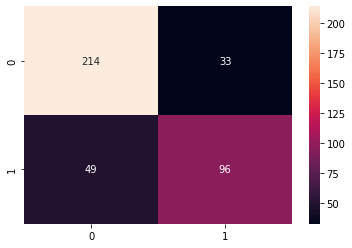

In [162]:
evaluate_log_reg(x, y, 9)

Accuracy : 0.82, Precision : 0.84, Recall : 0.80, F1-score : 0.82


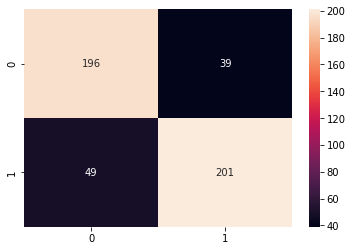

In [167]:
evaluate_log_reg(x_resampled_smote, y_resampled_smote, 9)

Accuracy : 0.81, Precision : 0.80, Recall : 0.81, F1-score : 0.81


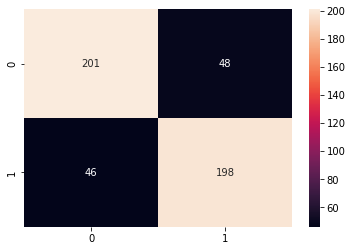

In [171]:
evaluate_log_reg(x_resampled_adasyn, y_resampled_adasyn, 9)

### Hyperparameter tuning of Logistic regression using oversampled data

#### Grid Search CV

In [173]:
# Instantiating the base estimator
base_estimator = LogisticRegression()

# Generating the parameter grid
param_grid = {'penalty':['l1', 'l2', 'elasticnet', None],
             'random_state':[9,64,80,18],
             'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
             'max_iter':[50,100,200,300,400],
             'warm_start':[True, False]}

# Instantiating the grid search cv
grid_search = GridSearchCV(estimator=base_estimator,
                          param_grid=param_grid, 
                          cv = 5, 
                          scoring = 'accuracy', 
                          n_jobs = -1, 
                          return_train_score=True)

# Splitting the data
tr_x, ts_x, tr_y, ts_y = train_test_split(x_resampled_smote, 
                                          y_resampled_smote,
                                          test_size=.3, 
                                          random_state=9)

# Finding the best estimator
grid_search.fit(tr_x, tr_y)

print(f'Best score : {grid_search.best_score_}')

y_pred = grid_search.predict(ts_x)

print(f'Precision : {precision_score(ts_y, y_pred)}, Recall : {recall_score(ts_y, y_pred)}, Accuracy : {accuracy_score(ts_y, y_pred)}')

# Getting the best estimator
grid_search.best_estimator_

#### Randomized search CV

In [206]:
# Instantiating the base estimator
base_estimator = LogisticRegression()

# Generating the parameter grid
param_grid = {'penalty':['l1', 'l2', 'elasticnet', None],
             'random_state':[9,64,80,18],
             'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
             'max_iter':[50,100,200,300,400],
             'warm_start':[True, False]}

# Instantiating the randomized search cv
random_search = RandomizedSearchCV(estimator=base_estimator,
                                   param_distributions=param_grid, 
                                   cv = 5, 
                                   scoring = 'accuracy', 
                                   n_jobs = -1, 
                                   return_train_score=True)

# Splitting the data
tr_x, ts_x, tr_y, ts_y = train_test_split(x_resampled_smote, 
                                          y_resampled_smote,
                                          test_size=.3, 
                                          random_state=9)

# Finding the best estimator
random_search.fit(tr_x, tr_y)

print(f'Best score : {random_search.best_score_}')

y_pred = random_search.predict(ts_x)

print(f'Precision : {precision_score(ts_y, y_pred)}, Recall : {recall_score(ts_y, y_pred)}, Accuracy : {accuracy_score(ts_y, y_pred)}')

# Getting the best estimator
random_search.best_estimator_

Best score : 0.8152352734786168
Precision : 0.8244897959183674, Recall : 0.808, Accuracy : 0.8123711340206186


/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was pass

LogisticRegression(random_state=18, solver='newton-cholesky', warm_start=True)

##### Checking the performance for ADASYN oversampled dataset

In [211]:
# Instantiating the base estimator
base_estimator = LogisticRegression()

# Generating the parameter grid
param_grid = {'penalty':['l1', 'l2', 'elasticnet', None],
             'random_state':[9,64,80,18],
             'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
             'max_iter':[50,100,200,300,400],
             'warm_start':[True, False]}

# Instantiating the grid search cv
grid_search = GridSearchCV(estimator=base_estimator,
                          param_grid=param_grid, 
                          cv = 5, 
                          scoring = 'accuracy', 
                          n_jobs = -1, 
                          return_train_score=True)

# Splitting the data
tr_x, ts_x, tr_y, ts_y = train_test_split(x_resampled_adasyn, 
                                          y_resampled_adasyn,
                                          test_size=.3, 
                                          random_state=9)

# Finding the best estimator
grid_search.fit(tr_x, tr_y)

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was pass

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was pass

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was pass

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed w

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was pass

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/li

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A col

  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was pass

  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWa

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/li

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A col

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/lin

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A col

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached whic

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached whic

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was pass

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A col

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached whic

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nilotpalmalakar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [50, 100, 200, 300, 400],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': [9, 64, 80, 18],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'warm_start': [True, False]},
             return_train_score=True, scoring='accuracy')

In [212]:
print(f'Best score : {grid_search.best_score_}')

y_pred = grid_search.predict(ts_x)

print(f'Precision : {precision_score(ts_y, y_pred)}, Recall : {recall_score(ts_y, y_pred)}, Accuracy : {accuracy_score(ts_y, y_pred)}')

# Getting the best estimator
grid_search.best_estimator_

Best score : 0.8067780520220239
Precision : 0.8048780487804879, Recall : 0.8114754098360656, Accuracy : 0.8093306288032455


LogisticRegression(random_state=9, warm_start=True)

<AxesSubplot: >

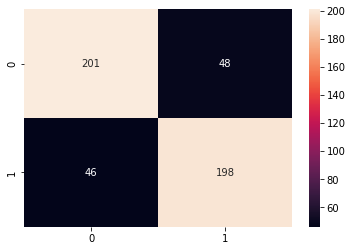

In [213]:
sns.heatmap(confusion_matrix(ts_y, y_pred), annot=True, fmt = '.3g')

In [ ]:
# Instantiating the base estimator
base_estimator = LogisticRegression()

# Generating the parameter grid
param_grid = {'penalty':['l1', 'l2', 'elasticnet', None],
             'random_state':[9,64,80,18],
             'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
             'max_iter':[50,100,200,300,400],
             'warm_start':[True, False]}

# Instantiating the randomized search cv
random_search = RandomizedSearchCV(estimator=base_estimator,
                                   param_distributions=param_grid, 
                                   cv = 5, 
                                   scoring = 'accuracy', 
                                   n_jobs = -1, 
                                   return_train_score=True)

# Splitting the data
tr_x, ts_x, tr_y, ts_y = train_test_split(x_resampled_adasyn, 
                                          y_resampled_adasyn,
                                          test_size=.3, 
                                          random_state=9)

# Finding the best estimator
random_search.fit(tr_x, tr_y)

In [209]:
print(f'Best score : {random_search.best_score_}')

y_pred = random_search.predict(ts_x)

print(f'Precision : {precision_score(ts_y, y_pred)}, Recall : {recall_score(ts_y, y_pred)}, Accuracy : {accuracy_score(ts_y, y_pred)}')

# Getting the best estimator
random_search.best_estimator_

Best score : 0.8059084868046327
Precision : 0.805668016194332, Recall : 0.8155737704918032, Accuracy : 0.8113590263691683


LogisticRegression(max_iter=300, penalty=None, random_state=9, warm_start=True)

<AxesSubplot: >

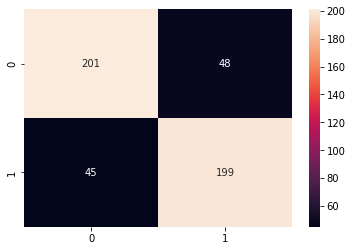

In [210]:
sns.heatmap(confusion_matrix(ts_y, y_pred), annot=True, fmt = '.3g')

In [214]:
from sklearn.metrics import classification_report

In [216]:
print(classification_report(ts_y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       249
           1       0.80      0.81      0.81       244

    accuracy                           0.81       493
   macro avg       0.81      0.81      0.81       493
weighted avg       0.81      0.81      0.81       493



In [218]:
random_search.best_estimator_

LogisticRegression(max_iter=300, penalty=None, random_state=9, warm_start=True)

In [219]:
ts_x.shape

(493, 11)

In [220]:
ts_x.head(1)

,pclass,sibsp,parch,fare,MissingBodyIndicator,age_imputed,age_missing_flag,sex_male,embarked_Q,embarked_S,age_chunks_ord_enc
770,3,0,0,7.8958,1,17.0,0.0,1,0,1,0


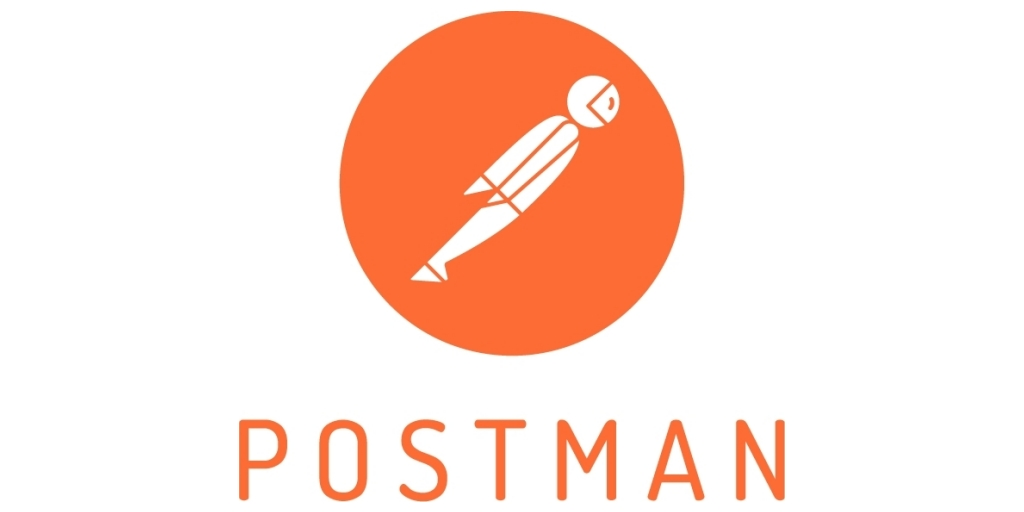